In [542]:
import numpy as np
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import plotly.express as px

In [5]:
# df = pd.read_csv("../Datasets/household_data_1min_singleindex.csv", parse_dates=["utc_timestamp", "cet_cest_timestamp"])
# df.head()
# df.describe()
# df.info()
# df.drop(df.columns[df.columns.str.contains("industrial")], axis=1, inplace=True)
# df.to_pickle("../Datasets/no_industrial_df.pickle")

In [6]:
df = pd.read_pickle("../Datasets/no_industrial_df.pickle")
df.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_public1_grid_import,DE_KN_public2_grid_import,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11 17:59:00+00:00,2014-12-11 18:59:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11 18:00:00+00:00,2014-12-11 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11 18:01:00+00:00,2014-12-11 19:01:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11 18:02:00+00:00,2014-12-11 19:02:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11 18:03:00+00:00,2014-12-11 19:03:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in range(1, 7):
    res_df = df[df.columns[df.columns.str.contains(f"residential{i}")]]
    print(f'Redidential {i}:', df.columns.str.contains(f"residential{i}").sum(), res_df.notnull().sum().sum() / np.product(res_df.shape), sep="\t")

Redidential 1:	6	0.3996241944728226
Redidential 2:	5	0.4667290528981207
Redidential 3:	8	0.6621601355448515
Redidential 4:	9	0.43227440964849256
Redidential 5:	4	0.601044889913152
Redidential 6:	7	0.4661736944882303


In [14]:
df3 = df[df.columns[df.columns.str.contains("residential3")].tolist() + ["utc_timestamp"]].copy()
df4 = df[df.columns[df.columns.str.contains("residential4")].tolist() + ["utc_timestamp"]].copy()
# del df

In [15]:
df3.describe()

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
count,1.992576e+06,1.745742e+06,1.723855e+06,1.353257e+06,714159.000000,1.353256e+06,1.505981e+06,1.832706e+06
mean,9.501481e+02,7.131943e+02,2.681584e+02,4.379180e+03,2508.730502,6.617964e+03,2.592242e+02,9.989745e+02
std,5.263461e+02,3.252883e+02,1.127242e+02,2.498119e+03,1516.856240,3.714973e+03,1.661289e+02,5.530942e+02
min,0.000000e+00,0.000000e+00,2.000000e-03,0.000000e+00,0.007000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.623528e+02,4.694310e+02,2.126695e+02,2.668843e+03,1196.114000,3.941027e+03,1.056820e+02,5.324520e+02
50%,9.198955e+02,7.962020e+02,3.221780e+02,4.190434e+03,2325.950000,6.592381e+03,2.506040e+02,1.042498e+03
75%,1.372459e+03,9.863240e+02,3.662680e+02,6.159709e+03,3981.188000,9.405719e+03,4.051740e+02,1.485650e+03
max,1.777363e+03,1.175990e+03,3.662680e+02,9.388804e+03,5778.129000,1.367366e+04,5.533620e+02,1.878474e+03


In [16]:
df3_normalized = (df3
    .set_index("utc_timestamp")
    .sort_index()
    .ffill()
    .dropna(how="all")
    .fillna(0)
    .diff(1)
    .assign(
        energy_consumption = lambda x: x[["DE_KN_residential3_circulation_pump", "DE_KN_residential3_dishwasher", "DE_KN_residential3_freezer", "DE_KN_residential3_refrigerator", "DE_KN_residential3_washing_machine"]].sum(axis=1)
    )
)

<AxesSubplot: xlabel='utc_timestamp'>

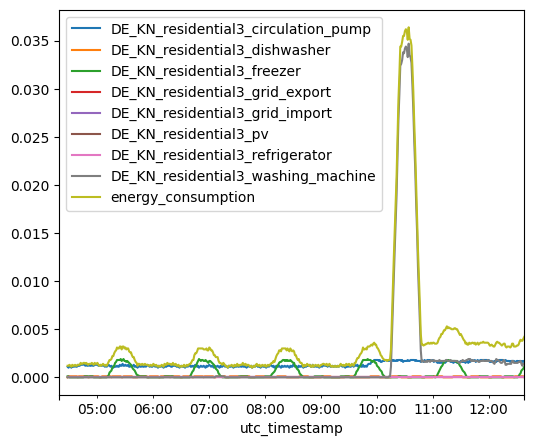

In [406]:
df3_normalized.iloc[3_500:4_000].rolling(10).mean().plot(figsize=(6, 5))

In [18]:
df3_normalized_nona = df3_normalized.dropna()[:1_000_000]


In [12]:
result = []
for i in tqdm(list(range(df3_normalized_nona.shape[0] // 10_000))):
    algo = rpt.Pelt(model="rbf").fit(df3_normalized_nona.energy_consumption.iloc[(10_000*i):(10_000 * (i + 1))].values)
    tmp = np.array(algo.predict(pen=3)) + (10_000*i)
    result.extend(tmp)
    print(i, end=" ")

  0%|          | 0/100 [00:00<?, ?it/s]

0 1 2 3 

KeyboardInterrupt: 

In [19]:
result = np.load("result.npy")

In [20]:
result = result.tolist()
result.insert(0, 0)
result = np.array(result)

In [21]:
df3_normalized_nona.energy_consumption.shape

(1000000,)

In [22]:
df3_mod_list = []
for start, end in zip(result[:-1], result[1:]):
    df3_mod_list.append(df3_normalized_nona[start:end].mean())

df3_modified = pd.DataFrame(df3_mod_list)
df3_modified.loc[:, "start"] = result[:-1]
df3_modified.loc[:, "end"] = result[1:]
df3_modified.loc[:, "step"] = result[1:] - result[:-1]
df3_modified.head()

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,energy_consumption,start,end,step
0,0.000800,0.000067,0.001400,0.0,0.0,0.0,0.0,0.0,0.002267,0,15,15
1,0.001133,0.000033,0.000083,0.0,0.0,0.0,0.0,0.0,0.001250,15,75,60
2,0.001150,0.000050,0.001700,0.0,0.0,0.0,0.0,0.0,0.002900,75,95,20
3,0.001154,0.000046,0.000077,0.0,0.0,0.0,0.0,0.0,0.001277,95,160,65
4,0.001100,0.000050,0.001750,0.0,0.0,0.0,0.0,0.0,0.002900,160,180,20


In [23]:
from sklearn.model_selection import train_test_split

In [314]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
model = LinearRegression()

In [144]:
import xgboost as xgb

In [412]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [413]:
#model = xgb.XGBRegressor(colsample_bytree=0.7)

In [414]:
cols = ["DE_KN_residential3_circulation_pump", "DE_KN_residential3_dishwasher", "DE_KN_residential3_freezer", "DE_KN_residential3_refrigerator", "DE_KN_residential3_washing_machine"]

In [415]:
#cols = ["DE_KN_residential3_dishwasher", "DE_KN_residential3_washing_machine"]

In [416]:
X = df3_modified.loc[:, ["energy_consumption", "step"]].values
y = df3_modified.loc[:, cols].values

In [417]:
y_test

array([[1.31428571e-03, 5.71428571e-05, 1.48571429e-03, 1.71428571e-04,
        0.00000000e+00],
       [1.20000000e-03, 0.00000000e+00, 2.00000000e-04, 0.00000000e+00,
        4.80000000e-03],
       [1.42857143e-04, 5.71428571e-05, 2.85714286e-05, 2.85714286e-05,
        0.00000000e+00],
       ...,
       [1.20000000e-03, 6.66666667e-05, 1.73333333e-03, 0.00000000e+00,
        0.00000000e+00],
       [1.12000000e-03, 4.00000000e-05, 1.72000000e-03, 4.80000000e-04,
        0.00000000e+00],
       [1.11111111e-04, 2.22222222e-05, 0.00000000e+00, 0.00000000e+00,
        5.11111111e-04]])

In [418]:
mask = (X[:, 0] > 1e-4)

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X[mask, :], y[mask, :], test_size=0.2)

In [449]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [450]:
pred_y = model.predict(X_test)

In [451]:
pred_y

array([[1.80526857e-03, 5.53152097e-05, 1.57732260e-03, 7.76647069e-04,
        3.05446545e-04],
       [1.54823313e-04, 3.91728408e-05, 6.49242026e-05, 1.66832207e-04,
        9.42474356e-05],
       [1.17420173e-03, 4.49970331e-05, 4.07470276e-05, 6.44276435e-04,
        4.57777791e-05],
       ...,
       [7.12080187e-04, 4.69698759e-05, 6.27870618e-04, 4.71056889e-04,
        8.68909665e-06],
       [1.04652040e-03, 4.66176643e-05, 1.43376297e-03, 4.57215156e-04,
        8.25504692e-05],
       [1.14934205e-03, 5.34295051e-05, 1.10605077e-04, 3.42350788e-04,
        2.26750498e-04]])

In [452]:
pred_full_y = model.predict(X)

In [453]:
df3_modified.loc[:, [col + "_pred" for col in cols]] = pred_full_y

In [454]:
df3_modified

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,energy_consumption,start,end,step,DE_KN_residential3_circulation_pump_pred,DE_KN_residential3_dishwasher_pred,DE_KN_residential3_freezer_pred,DE_KN_residential3_refrigerator_pred,DE_KN_residential3_washing_machine_pred
0,0.000800,0.000067,0.001400,0.0,0.000000,0.0,0.000000,0.000000,0.002267,0,15,15,0.001159,0.000135,0.000446,0.000369,1.570772e-04
1,0.001133,0.000033,0.000083,0.0,0.000000,0.0,0.000000,0.000000,0.001250,15,75,60,0.001126,0.000043,0.000024,0.000056,6.281018e-07
2,0.001150,0.000050,0.001700,0.0,0.000000,0.0,0.000000,0.000000,0.002900,75,95,20,0.001047,0.000069,0.001681,0.000063,4.143345e-05
3,0.001154,0.000046,0.000077,0.0,0.000000,0.0,0.000000,0.000000,0.001277,95,160,65,0.001029,0.000043,0.000104,0.000100,1.541346e-06
4,0.001100,0.000050,0.001750,0.0,0.000000,0.0,0.000000,0.000000,0.002900,160,180,20,0.001047,0.000069,0.001681,0.000063,4.143345e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,0.001154,0.000077,0.000000,0.0,0.025754,0.0,0.000492,0.021523,0.023246,999725,999790,65,0.001151,0.000070,0.000138,0.000469,2.143325e-02
19880,0.001144,0.000089,0.000000,0.0,0.004856,0.0,0.000411,0.000478,0.002122,999790,999880,90,0.001091,0.000067,0.000050,0.000449,4.655941e-04
19881,0.001091,0.000091,0.000000,0.0,0.004455,0.0,0.000000,0.000218,0.001400,999880,999935,55,0.001033,0.000047,0.000165,0.000124,3.031235e-05
19882,0.001089,0.000067,0.000000,0.0,0.003644,0.0,0.000778,0.000000,0.001933,999935,999980,45,0.001050,0.000051,0.000146,0.000686,0.000000e+00


<AxesSubplot: >

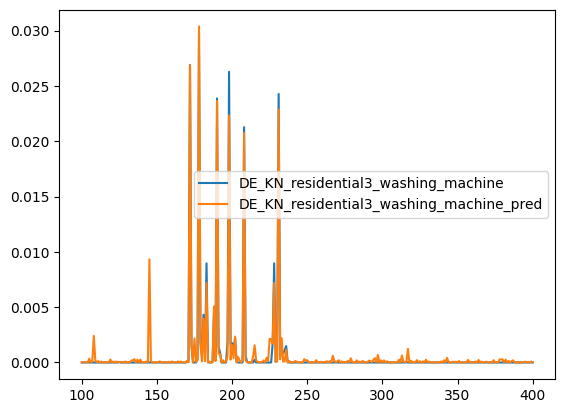

In [455]:
df3_modified.loc[100:400, ["DE_KN_residential3_washing_machine", "DE_KN_residential3_washing_machine_pred"]].plot()

<AxesSubplot: >

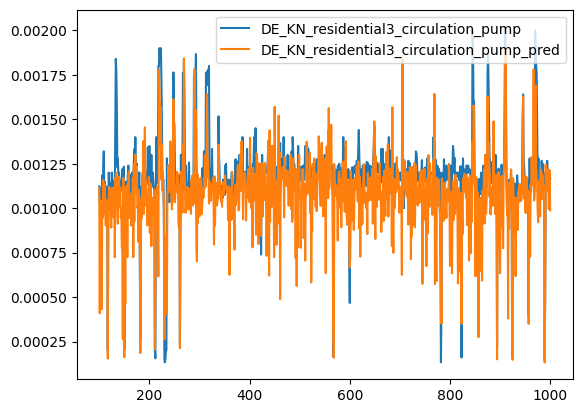

In [456]:
df3_modified.loc[100:1000, ["DE_KN_residential3_circulation_pump", "DE_KN_residential3_circulation_pump_pred"]].plot()

<AxesSubplot: >

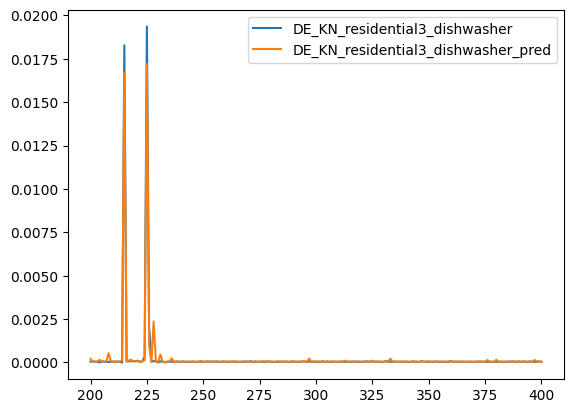

In [457]:
df3_modified.loc[200:400, ["DE_KN_residential3_dishwasher", "DE_KN_residential3_dishwasher_pred"]].plot()

<AxesSubplot: >

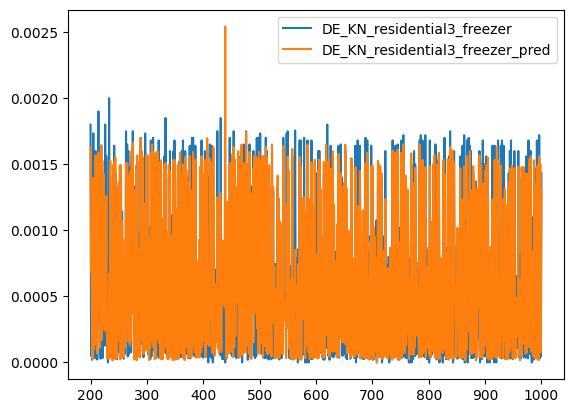

In [458]:
df3_modified.loc[200:1000, ["DE_KN_residential3_freezer", "DE_KN_residential3_freezer_pred"]].plot()

<AxesSubplot: >

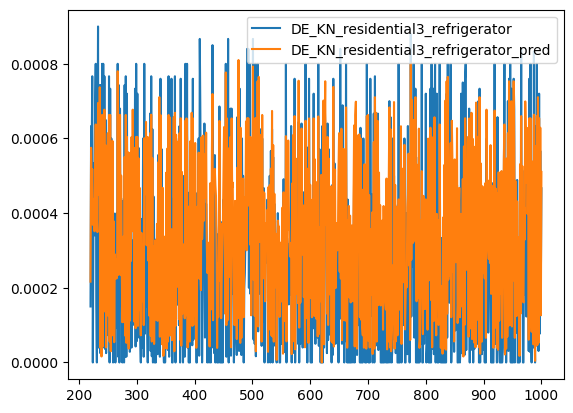

In [475]:
df3_modified.loc[220:1000, ["DE_KN_residential3_refrigerator", "DE_KN_residential3_refrigerator_pred"]].plot()

In [460]:
y_train.shape

(15889, 5)

In [461]:
model.predict(X_train).shape

(15889, 5)

In [481]:
for i in range(0,5):
    y_test_ = y_train[:, i]
    pred_y_ = model.predict(X_train)[:, i]
    print(mean_absolute_percentage_error(y_test_, pred_y_))
    #mask = np.logical_and(~np.isclose(y_test_, np.zeros_like(y_test_)), (X_train[:, 0] > 1e-3))
    mask = ~np.isclose(y_test_, np.zeros_like(y_test_))
    print(mean_absolute_percentage_error(y_test_[mask], pred_y_[mask]))
    print(np.sqrt(mean_squared_error(y_train[mask], model.predict(X_train)[mask]))/np.mean(model.predict(X_train)[:, i]))

162185141.65271327
0.5630693415495933
0.7635099517146156
67432152569.32408
1.541418539562615
0.8154332544891955
203528778800.2323
1.2103542878585258
1.3369346823585533
137423593662.71867
0.9654571971766052
1.6933934887329263
396008401807.79
1.2182536601202858
0.5809029864683855


In [480]:
pred_y.shape

(3973, 5)

In [477]:
mean_absolute_percentage_error(y_train, model.predict(X_train)) 

160911022396.3406

In [465]:
#mask = np.logical_and(~np.isclose(y_test, np.zeros_like(y_test)), np.vstack(((X_test[:, 0] < 1e-3), (X_test[:, 0] < 1e-3))).T)
mask = ~np.isclose(y_train, np.zeros_like(y_train))

In [466]:
mask

array([[ True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True, False, False, False],
       ...,
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False]])

In [543]:
mean_absolute_percentage_error(y_train[mask], model.predict(X_train)[mask])

0.4237508973457


In [ ]:
y_test[mask]

In [ ]:
pred_y[mask]

In [470]:
np.sqrt(mean_squared_error(y_test, pred_y))

0.0005980899177954576

In [471]:
0.005**2

2.5e-05

In [482]:
df3_modified

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,energy_consumption,start,end,step,DE_KN_residential3_circulation_pump_pred,DE_KN_residential3_dishwasher_pred,DE_KN_residential3_freezer_pred,DE_KN_residential3_refrigerator_pred,DE_KN_residential3_washing_machine_pred
0,0.000800,0.000067,0.001400,0.0,0.000000,0.0,0.000000,0.000000,0.002267,0,15,15,0.001159,0.000135,0.000446,0.000369,1.570772e-04
1,0.001133,0.000033,0.000083,0.0,0.000000,0.0,0.000000,0.000000,0.001250,15,75,60,0.001126,0.000043,0.000024,0.000056,6.281018e-07
2,0.001150,0.000050,0.001700,0.0,0.000000,0.0,0.000000,0.000000,0.002900,75,95,20,0.001047,0.000069,0.001681,0.000063,4.143345e-05
3,0.001154,0.000046,0.000077,0.0,0.000000,0.0,0.000000,0.000000,0.001277,95,160,65,0.001029,0.000043,0.000104,0.000100,1.541346e-06
4,0.001100,0.000050,0.001750,0.0,0.000000,0.0,0.000000,0.000000,0.002900,160,180,20,0.001047,0.000069,0.001681,0.000063,4.143345e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,0.001154,0.000077,0.000000,0.0,0.025754,0.0,0.000492,0.021523,0.023246,999725,999790,65,0.001151,0.000070,0.000138,0.000469,2.143325e-02
19880,0.001144,0.000089,0.000000,0.0,0.004856,0.0,0.000411,0.000478,0.002122,999790,999880,90,0.001091,0.000067,0.000050,0.000449,4.655941e-04
19881,0.001091,0.000091,0.000000,0.0,0.004455,0.0,0.000000,0.000218,0.001400,999880,999935,55,0.001033,0.000047,0.000165,0.000124,3.031235e-05
19882,0.001089,0.000067,0.000000,0.0,0.003644,0.0,0.000778,0.000000,0.001933,999935,999980,45,0.001050,0.000051,0.000146,0.000686,0.000000e+00


In [497]:
df3_modified = df3_modified.assign(cstep=lambda x: x["step"].cumsum())

In [516]:
d = df3_modified.set_index(pd.TimedeltaIndex(data=df3_modified["cstep"], unit="minutes")).resample("H").sum()

In [574]:
d.to_pickle("dataset.pickle")

In [534]:
cols = ['DE_KN_residential3_circulation_pump', 'DE_KN_residential3_dishwasher',
       'DE_KN_residential3_freezer',
       'DE_KN_residential3_refrigerator', 'DE_KN_residential3_washing_machine']
cols_pred = [
    'DE_KN_residential3_circulation_pump_pred',
       'DE_KN_residential3_dishwasher_pred', 'DE_KN_residential3_freezer_pred',
       'DE_KN_residential3_refrigerator_pred',
       'DE_KN_residential3_washing_machine_pred'
        ]

In [578]:
d_prep = d.drop(columns=['energy_consumption', 'start', 'end', 'step', 'cstep']).resample("D").sum()
def piechart(i, pred):
    if pred:
        data = d_prep[cols_pred].iloc[i]
        fig = px.pie(pd.DataFrame({"names": ['Pompa cyrkulacyjna', 'Zmywarka', 'Zamrażarka', 'Lodówka', 'Pralka'], "values": data.values}), values='values', names='names')
        return fig
    else:
        data = d_prep[cols].iloc[i]
        fig = px.pie(pd.DataFrame({"names": ['Pompa cyrkulacyjna', 'Zmywarka', 'Zamrażarka', 'Lodówka', 'Pralka'], "values": data.values}), values='values', names='names')
        return fig

In [586]:
def barplot(i, pred):
    if pred:
        data = d_prep[cols_pred].iloc[i]
        fig = px.bar(pd.DataFrame({"names": ['Pompa cyrkulacyjna', 'Zmywarka', 'Zamrażarka', 'Lodówka', 'Pralka'], "values": data.values}), x='values', y='names', title="Zużycie energi w [kWh]", labels={'values':'Energia w kWh', 'names': "Urządzenie"})
        return fig
    else:
        data = d_prep[cols].iloc[i]
        fig = px.bar(pd.DataFrame({"names": ['Pompa cyrkulacyjna', 'Zmywarka', 'Zamrażarka', 'Lodówka', 'Pralka'], "values": data.values}), x='values', y='names', title="Zużycie energi w [kWh]", labels={'values':'Energia w kWh', 'names': "Urządzenie"})
        return fig

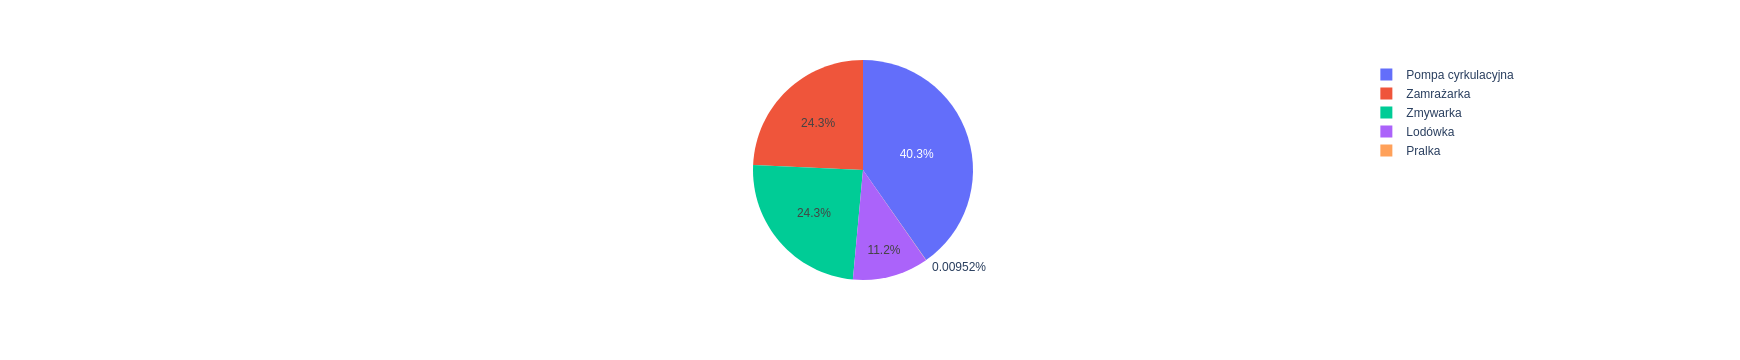

In [587]:
piechart(100, False)

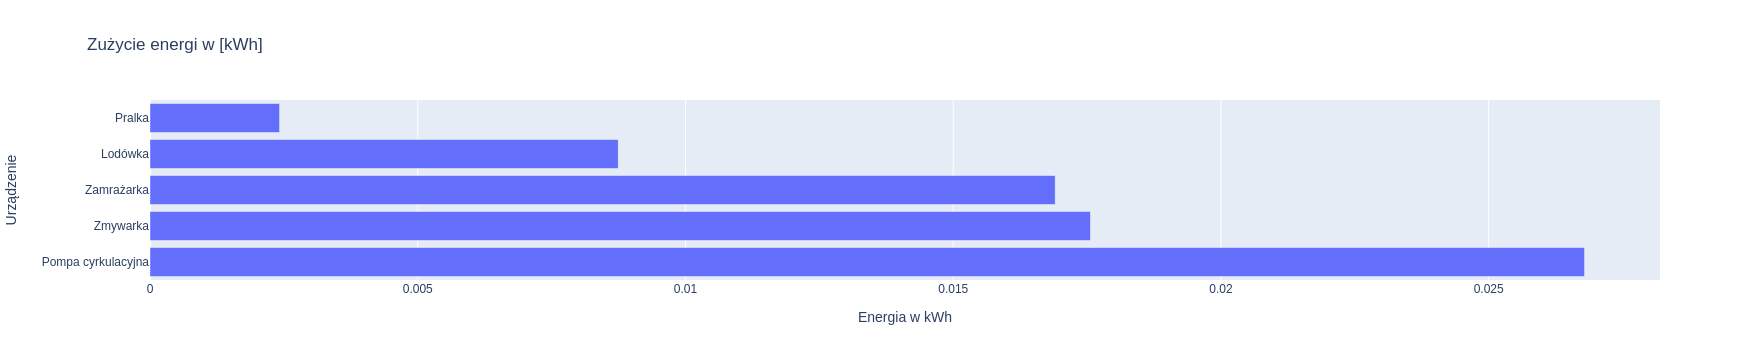

In [588]:
barplot(100, True)